In [1]:
#Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
#Load Datas.
df_train = pd.read_csv('Property_Price_Train.csv')
df_test  = pd.read_csv('Property_Price_Test.csv')

In [3]:
df_train.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1459, 81)

In [5]:
#Checking data information.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [6]:
df_train.describe()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1378.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,46.382454,567.535984,1057.293352,1162.562714,347.230295,5.848526,1515.641535,0.424949,0.057574,1.565456,0.382454,2.866347,1.046607,6.518163,0.613434,1978.515965,1.767649,470.934787,93.015667,47.811902,24.580227,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,161.248500,441.874057,438.824912,386.712553,436.583480,48.639512,525.616607,0.518870,0.238830,0.550906,0.502798,0.816050,0.220410,1.625894,0.644687,24.696004,0.747301,210.668787,124.796682,67.467586,61.353507,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,-129.369350,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,0.000000,223.500000,795.500000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,329.290489,9.656026,1.843186,-16.807302,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,471.028116,92.803628,46.837919,25.026953,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,607.184977,180.335986,96.523486,66.237591,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1147.488093,572.298709,255.362547,225.762714,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Exploratory Data Analysis

In [7]:
#Dropping 'Id' column as it is a unique variable.
df_train.drop(["Id"], axis=1, inplace=True)
id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [8]:
# Define Numeric and Categorical columns.
numerical_cols = []
categorical_cols = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        numerical_cols.append(df_train[col].name)
    else:
        categorical_cols.append(df_train[col].name)

In [9]:
#Save numerical and categorigal data in independent dataframes for train and test data.
df_numerical_train = df_train[numerical_cols]
df_categorical_train = df_train[categorical_cols]

df_numerical_test = df_test[numerical_cols[0:-1]]
df_categorical_test = df_test[categorical_cols]

In [10]:
df_numerical_train.columns

Index(['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [11]:
df_categorical_test.columns

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

#EDA with numerical data

array([[<AxesSubplot:title={'center':'Building_Class'}>,
        <AxesSubplot:title={'center':'Lot_Extent'}>,
        <AxesSubplot:title={'center':'Lot_Size'}>,
        <AxesSubplot:title={'center':'Overall_Material'}>,
        <AxesSubplot:title={'center':'House_Condition'}>,
        <AxesSubplot:title={'center':'Construction_Year'}>],
       [<AxesSubplot:title={'center':'Remodel_Year'}>,
        <AxesSubplot:title={'center':'Brick_Veneer_Area'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'Total_Basement_Area'}>],
       [<AxesSubplot:title={'center':'First_Floor_Area'}>,
        <AxesSubplot:title={'center':'Second_Floor_Area'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'Grade_Living_Area'}>,
        <AxesSubplot:title={'center':'Underground_Full_Bathroom'}>,
        <AxesSubplot:ti

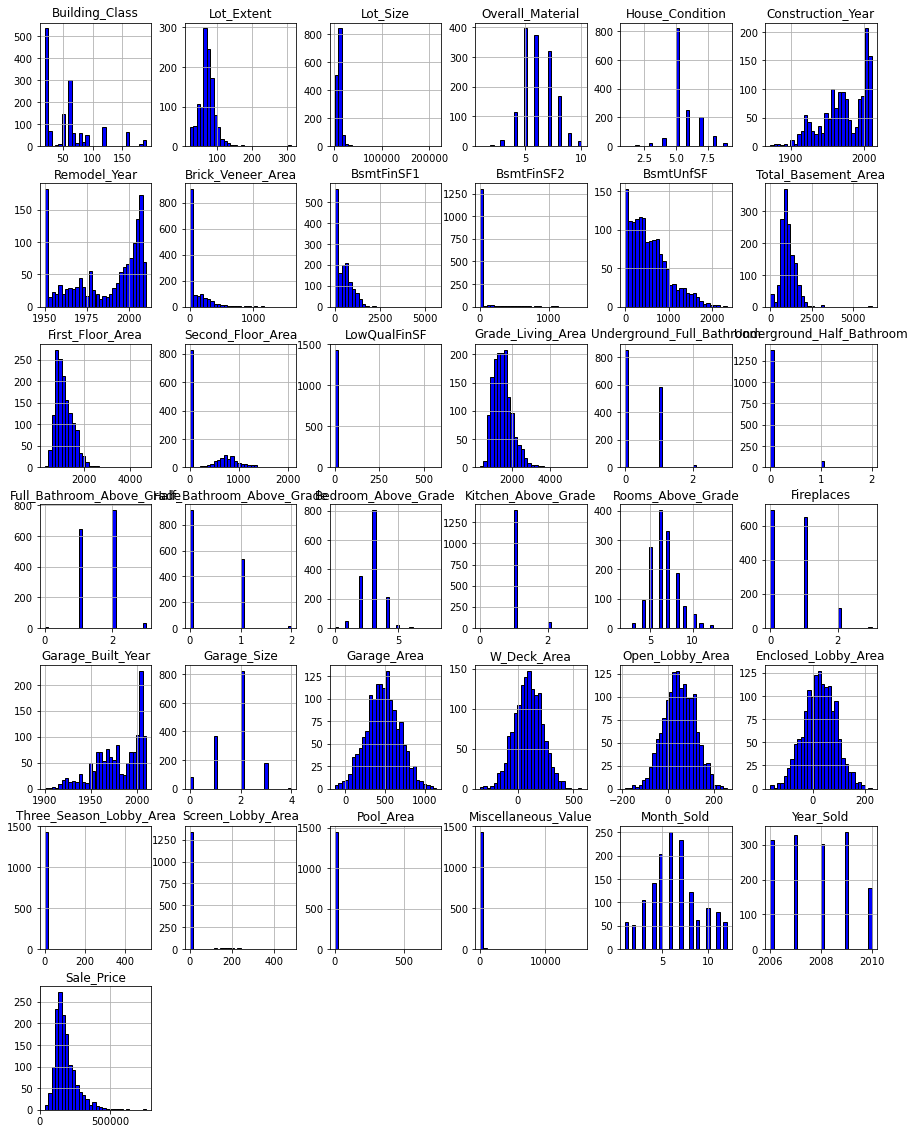

In [12]:
df_numerical_train.hist(figsize=(15,20), bins=30, color='blue', edgecolor='black')

In [13]:
#Importing VarianceThreshold to drop column with low variance
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(threshold=0.15)
df_high_variance = thresholder.fit(df_numerical_train)

In [14]:
#Drop column where 85% of the values are constant.
high_variance_list = []
for col in df_numerical_train.columns:
    if col not in df_numerical_train.columns[thresholder.get_support()]:
        high_variance_list.append(col)

high_variance_list

['Underground_Half_Bathroom', 'Kitchen_Above_Grade']

In [15]:
df_train.drop(high_variance_list, axis=1, inplace=True)
df_test.drop(high_variance_list, axis=1, inplace=True)

#Checking correlation between numerical variable

<AxesSubplot:>

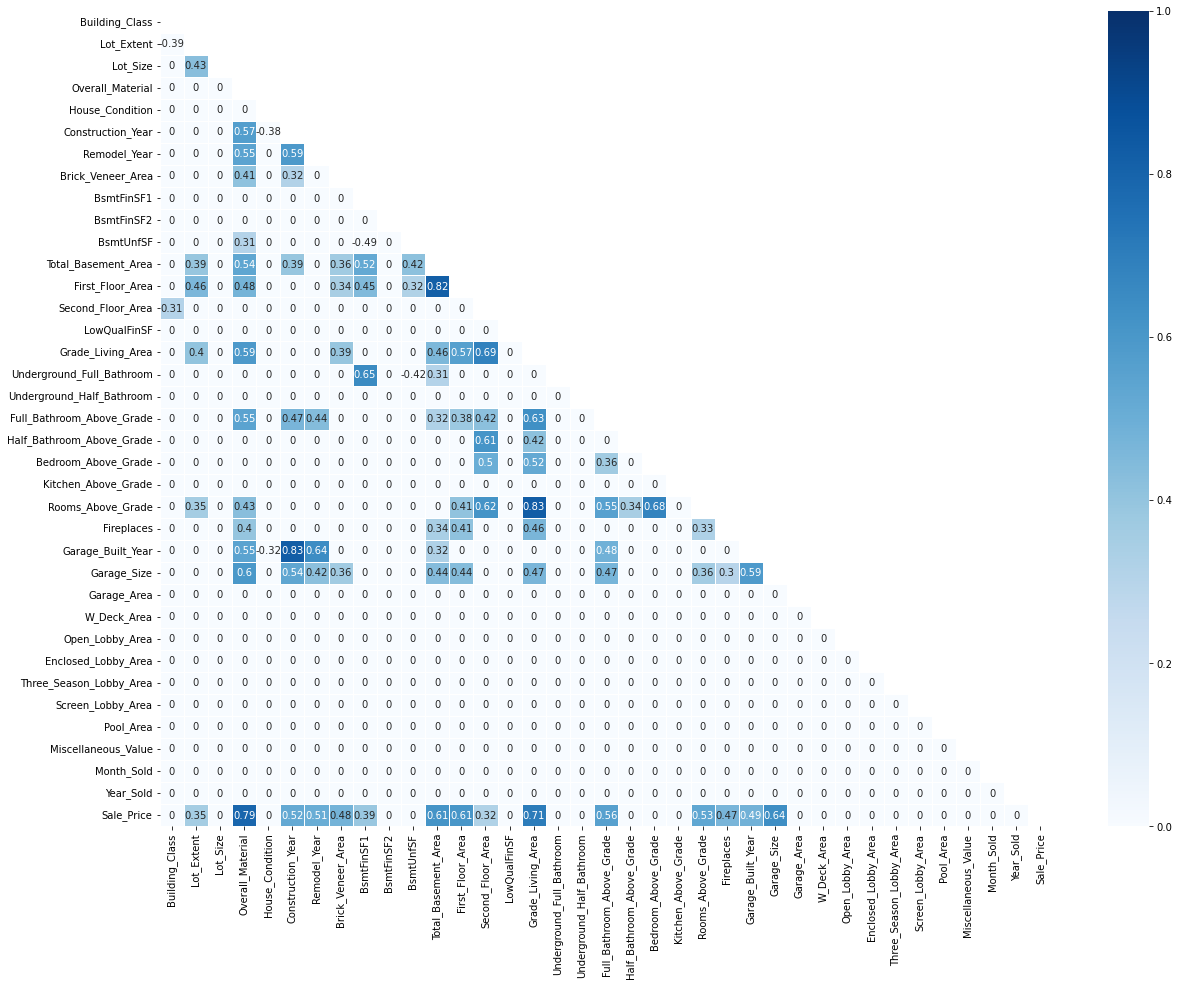

In [16]:
# plot correlation heatmap
plt.figure(figsize = (20,15))

corr_matrix = df_numerical_train.corr()
mask =  np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
sns.heatmap(corr_matrix, annot=True, mask=mask, linewidths=0.5,cmap='Blues', vmin=0, vmax=1)

In [17]:
#Variables that have a low correlation with 'SalePrice' [less than 0.25 or -0.25]
condition  = df_numerical_train.corr()['Sale_Price'] < 0.25
condition2 = df_numerical_train.corr()['Sale_Price'] > -0.25
low_corr_cols = (df_numerical_train.corr()[condition & condition2]['Sale_Price'].index).to_list()
low_corr_cols

['Building_Class',
 'House_Condition',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Garage_Area',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Three_Season_Lobby_Area',
 'Screen_Lobby_Area',
 'Pool_Area',
 'Miscellaneous_Value',
 'Month_Sold',
 'Year_Sold']

In [18]:
#Variables that have a high correlation with 'SalePrice'.
high_corr_cols = [elem for elem in (df_numerical_train.columns).to_list() if elem not in low_corr_cols]
high_corr_cols

['Lot_Extent',
 'Lot_Size',
 'Overall_Material',
 'Construction_Year',
 'Remodel_Year',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Rooms_Above_Grade',
 'Fireplaces',
 'Garage_Built_Year',
 'Garage_Size',
 'Sale_Price']

In [19]:
# drop variables that have a low correlation with 'SalePrice'.
for i in range(len(low_corr_cols)):
    if i in df_train.columns:
        df_train.drop(low_corr_cols, axis=1)
        df_test.drop(low_corr_cols, axis=1)

#EDA with categorical data

In [20]:
#Create categorical dataframe and add 'SalePrice' column.
categorical_cols.append('Sale_Price')
df_categorical_train = df_train[categorical_cols]
df_categorical_train.columns

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition', 'Sale_Price'],
      dtype='object')

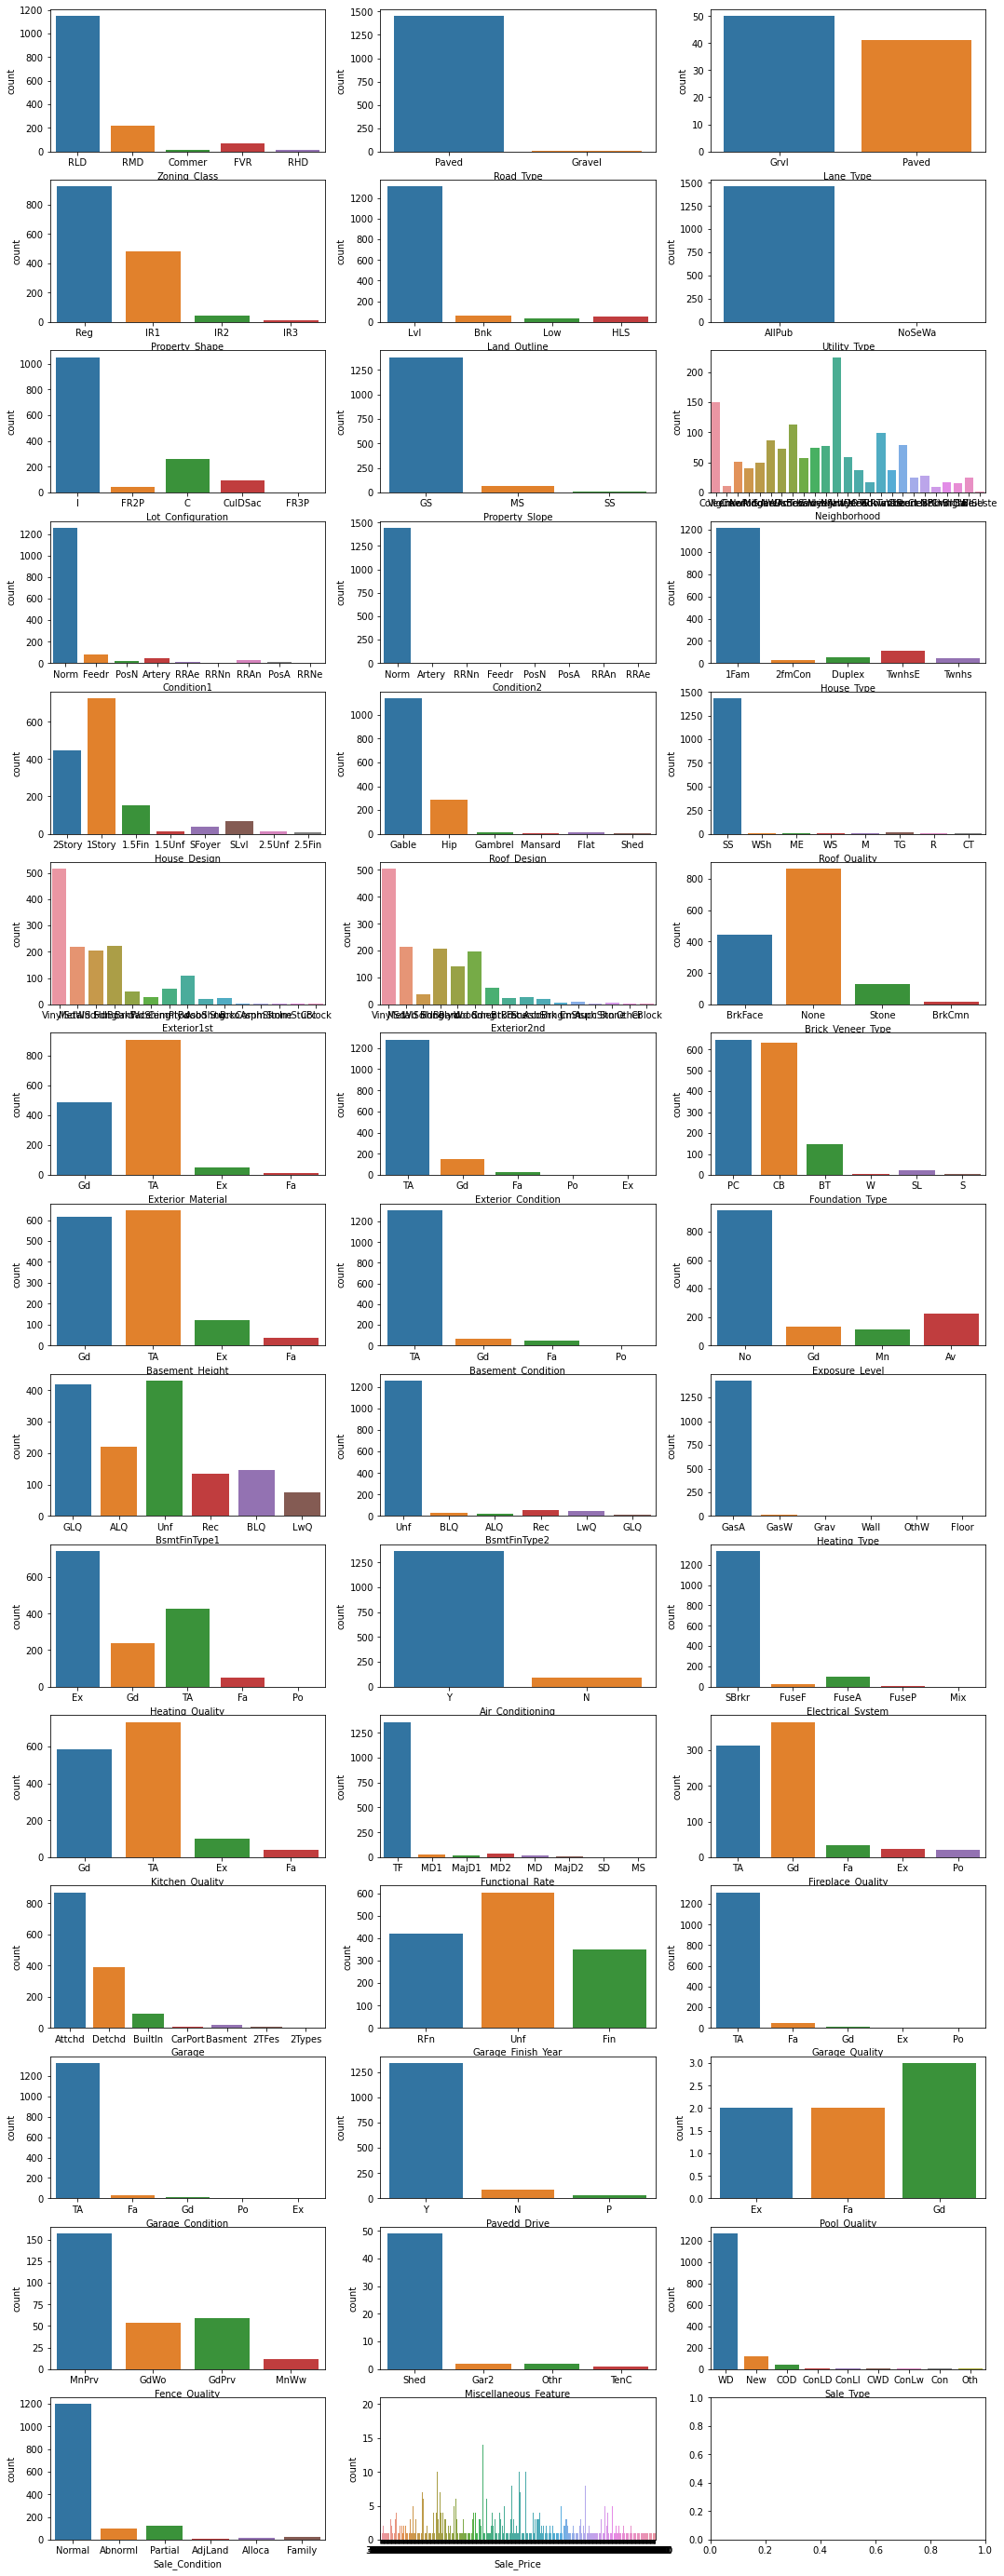

In [21]:
fig, axes = plt.subplots(15, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_categorical_train.columns:
    if j==3:
        i += 1
        j = 0
        sns.countplot(x=df_categorical_train[col], data=df_categorical_train, ax=axes[i,j])
    else:
        sns.countplot(x=df_categorical_train[col], data=df_categorical_train, ax=axes[i,j])
    j += 1

In [22]:
# variables are highly dominated by one feature (more than 90%).

high_dominated_features = []
for col in df_categorical_train.columns:
    if (df_categorical_train[col].value_counts().max()/df_categorical_train[col].count()) > 0.9:
        high_dominated_features.append(col)
        
high_dominated_features

['Road_Type',
 'Utility_Type',
 'Property_Slope',
 'Condition2',
 'Roof_Quality',
 'Basement_Condition',
 'Heating_Type',
 'Air_Conditioning',
 'Electrical_System',
 'Functional_Rate',
 'Garage_Quality',
 'Garage_Condition',
 'Pavedd_Drive',
 'Miscellaneous_Feature']

In [23]:
df_train.drop(high_dominated_features, axis=1, inplace=True)
df_test.drop(high_dominated_features, axis=1, inplace=True)

#Describing 'SalePrice' with each categorical feature.

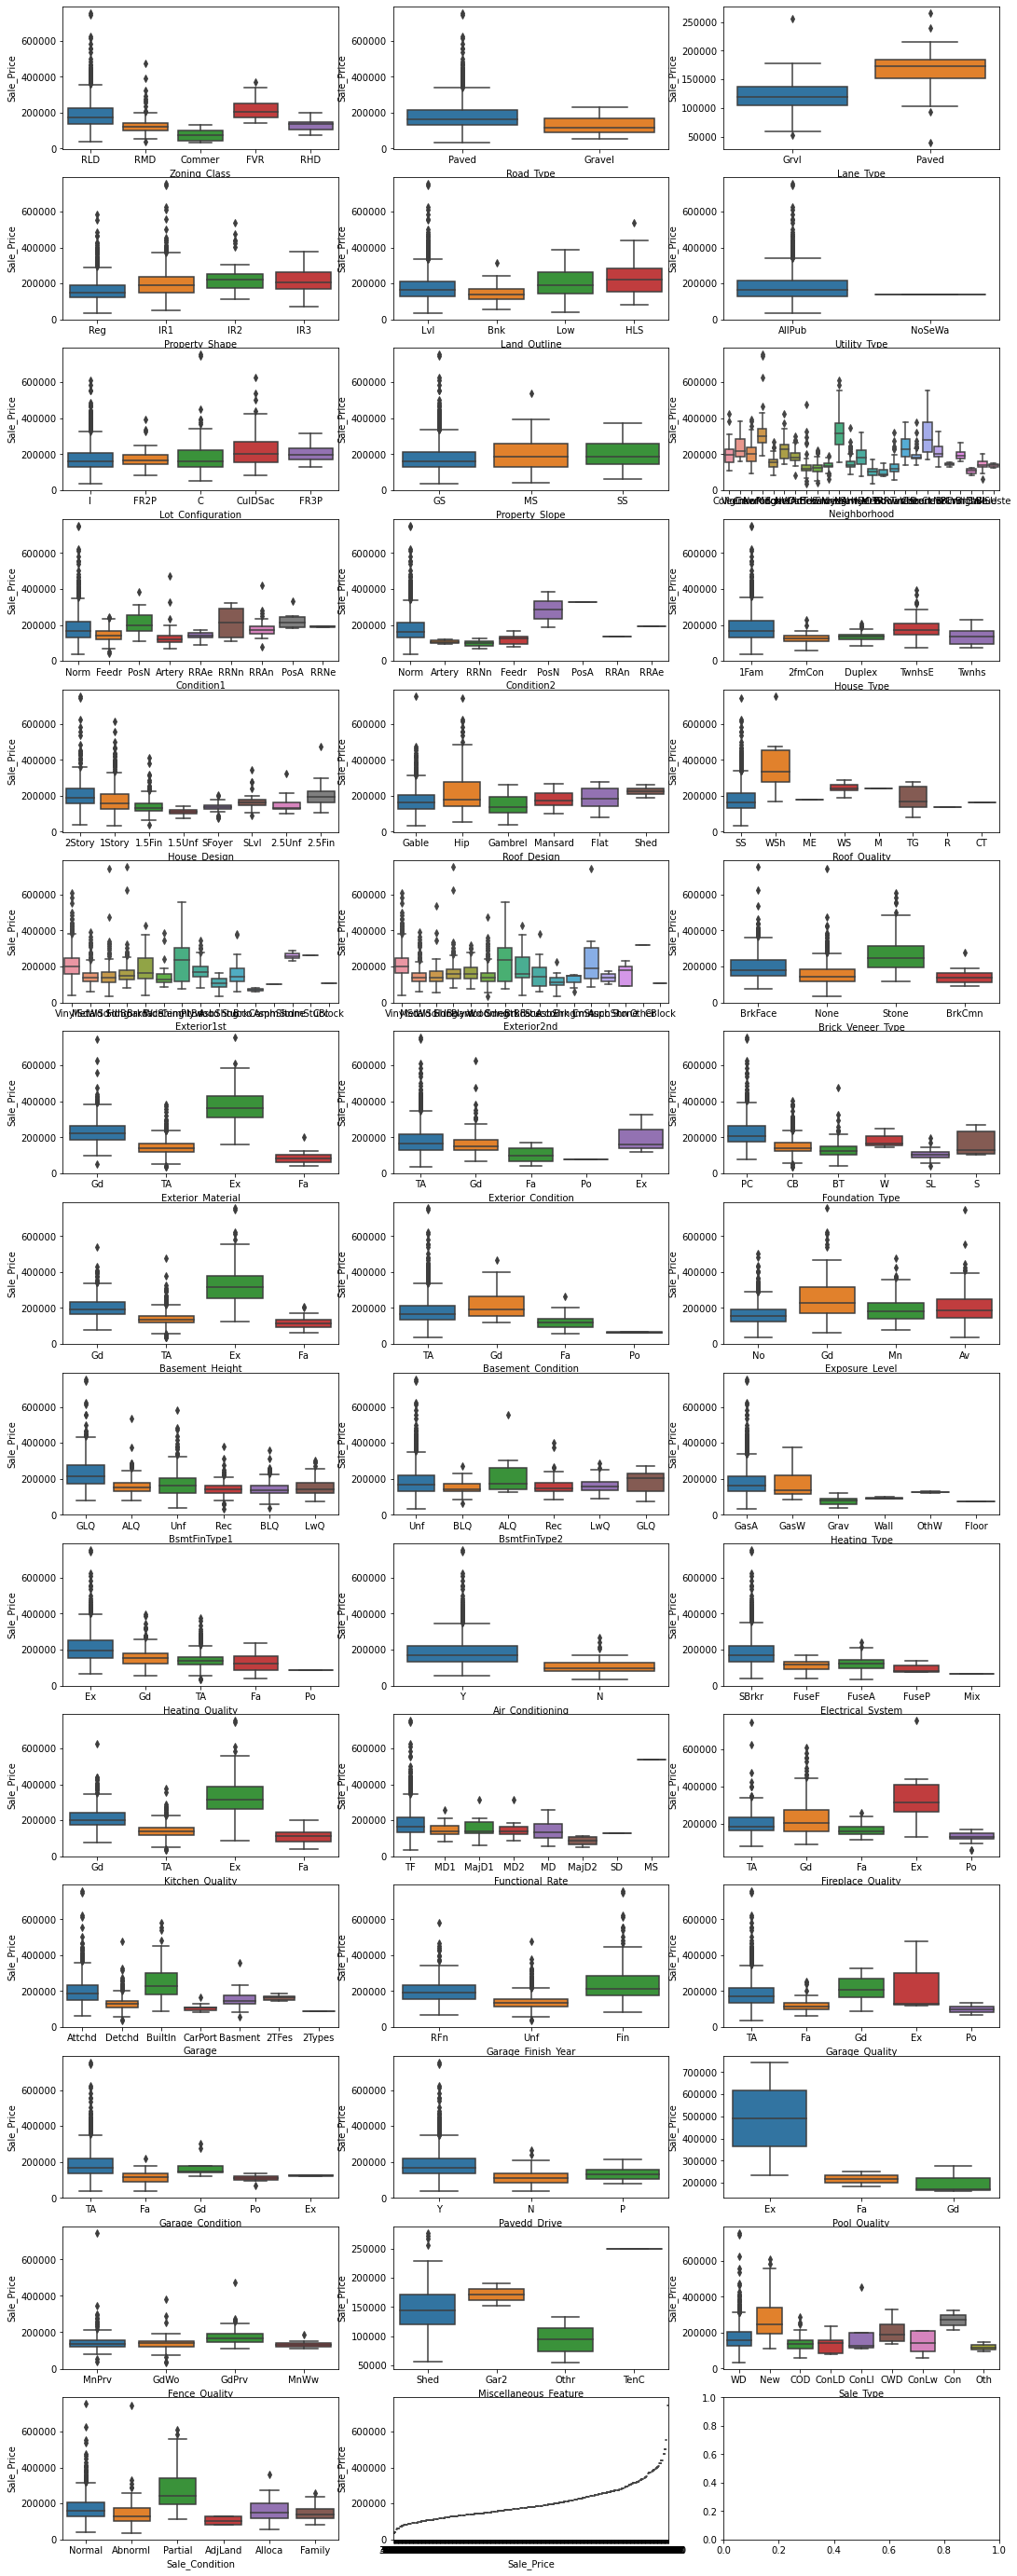

In [24]:
fig, axes = plt.subplots(15, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_categorical_train.columns:
    if j==3:
        i += 1
        j = 0
        sns.boxplot(x=col, y="Sale_Price", data=df_categorical_train, ax=axes[i,j])
    else:
        sns.boxplot(x=col, y="Sale_Price", data=df_categorical_train, ax=axes[i,j])
    j += 1

In [25]:
df_train.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Lane_Type',
       'Property_Shape', 'Land_Outline', 'Lot_Configuration', 'Neighborhood',
       'Condition1', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area',
       'Heating_Quality', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grade',
       'Fireplaces', 'Fireplace_Quality', 'Garage', 'Garage_Built_Year',
       'Garage_Finish_Year', 'Garage_Size', 'Garag

In [26]:
df_test.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Lane_Type',
       'Property_Shape', 'Land_Outline', 'Lot_Configuration', 'Neighborhood',
       'Condition1', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area',
       'Heating_Quality', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grade',
       'Fireplaces', 'Fireplace_Quality', 'Garage', 'Garage_Built_Year',
       'Garage_Finish_Year', 'Garage_Size', 'Garag

#Data cleaning.

#Treating duplicates from the data.

In [27]:
print('number of duplicate values in df_numerical_train dataframe:',df_numerical_train.duplicated().sum())
print('number of duplicate values in df_numerical_test dataframe:',df_numerical_test.duplicated().sum())
print('number of duplicate values in df_categorical_train dataframe:',df_categorical_train.duplicated().sum())
print('number of duplicate values in df_categorical_test dataframe:',df_categorical_test.duplicated().sum())

number of duplicate values in df_numerical_train dataframe: 0
number of duplicate values in df_numerical_test dataframe: 0
number of duplicate values in df_categorical_train dataframe: 1
number of duplicate values in df_categorical_test dataframe: 13


In [28]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [29]:
#Confirming changes.
print('number of duplicate values in df_train dataframe: ',df_train.duplicated().sum())
print('number of duplicate values in df_test dataframe: ',df_test.duplicated().sum())

number of duplicate values in df_train dataframe:  0
number of duplicate values in df_test dataframe:  0


#Treating Missing Values.

<AxesSubplot:>

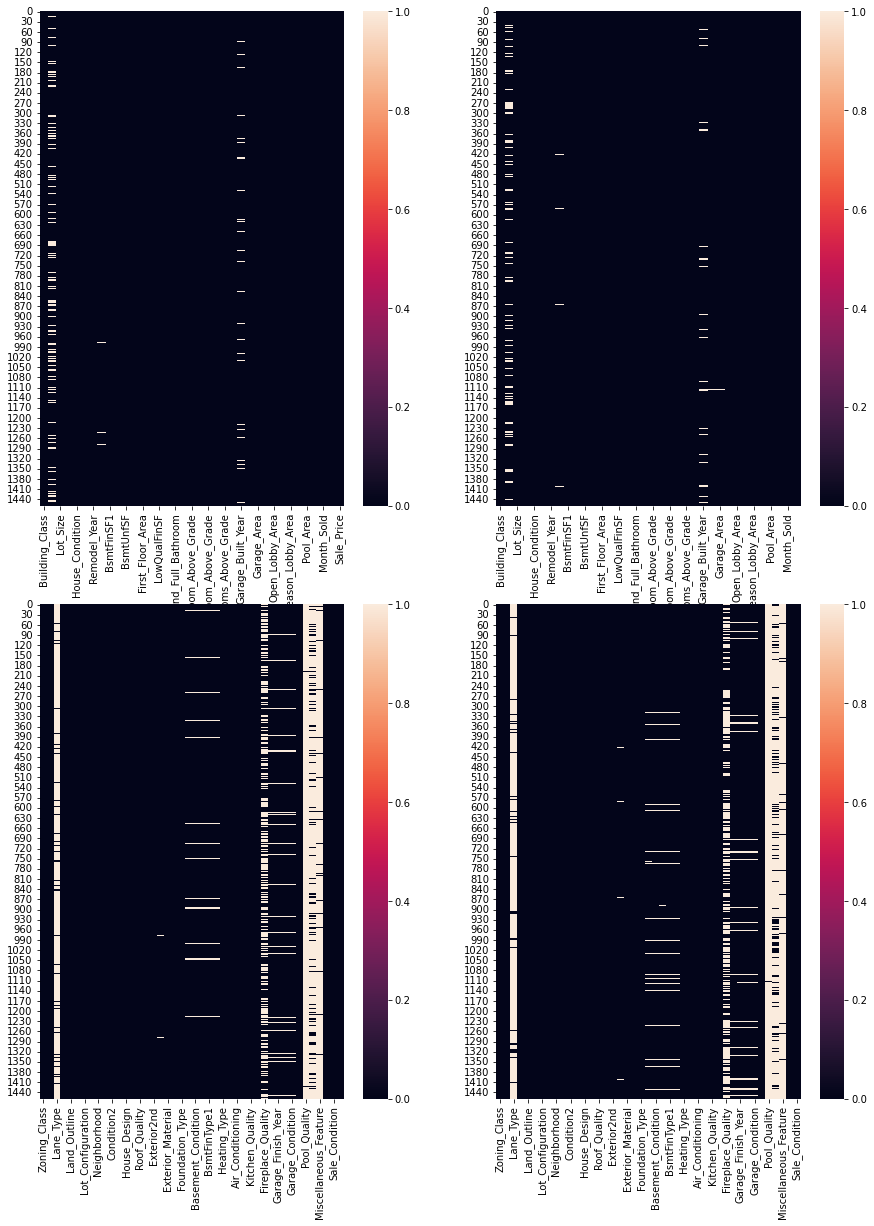

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15,20))
sns.heatmap(df_numerical_train.isnull(), ax=axes[0,0])
sns.heatmap(df_numerical_test.isnull(), ax=axes[0,1])
sns.heatmap(df_categorical_train.isnull(), ax=axes[1,0])
sns.heatmap(df_categorical_test.isnull(), ax=axes[1,1])

In [31]:
# drop columns with missing more than 30%
def drop_missing(df):
    i = 0
    for col in df:
        if (df[col].isnull().sum()/1460) > 0.3:
            df.drop(col, axis=1, inplace=True)
            print('column',col,'is dropped')
            i += 1
    if i == 0:
        print('no column dropped')

In [32]:
drop_missing(df_train)

column Lane_Type is dropped
column Fireplace_Quality is dropped
column Pool_Quality is dropped
column Fence_Quality is dropped


In [33]:
drop_missing(df_test)

column Lane_Type is dropped
column Fireplace_Quality is dropped
column Pool_Quality is dropped
column Fence_Quality is dropped


In [34]:
def fill_null(df):
    for col in df:
        if (col in numerical_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mean(), inplace = True)
            print('fillna numerical column: ',col)
        if (col in categorical_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mode().iloc[0], inplace = True)
            print('fillna categorical column: ',col)

In [35]:
fill_null(df_train)

fillna numerical column:  Lot_Extent
fillna categorical column:  Brick_Veneer_Type
fillna numerical column:  Brick_Veneer_Area
fillna categorical column:  Basement_Height
fillna categorical column:  Exposure_Level
fillna categorical column:  BsmtFinType1
fillna categorical column:  BsmtFinType2
fillna categorical column:  Garage
fillna numerical column:  Garage_Built_Year
fillna categorical column:  Garage_Finish_Year


In [36]:
fill_null(df_test)

fillna categorical column:  Zoning_Class
fillna numerical column:  Lot_Extent
fillna categorical column:  Exterior1st
fillna categorical column:  Exterior2nd
fillna categorical column:  Brick_Veneer_Type
fillna numerical column:  Brick_Veneer_Area
fillna categorical column:  Basement_Height
fillna categorical column:  Exposure_Level
fillna categorical column:  BsmtFinType1
fillna numerical column:  BsmtFinSF1
fillna categorical column:  BsmtFinType2
fillna numerical column:  BsmtFinSF2
fillna numerical column:  BsmtUnfSF
fillna numerical column:  Total_Basement_Area
fillna numerical column:  Underground_Full_Bathroom
fillna categorical column:  Kitchen_Quality
fillna categorical column:  Garage
fillna numerical column:  Garage_Built_Year
fillna categorical column:  Garage_Finish_Year
fillna numerical column:  Garage_Size
fillna numerical column:  Garage_Area
fillna categorical column:  Sale_Type


<AxesSubplot:>

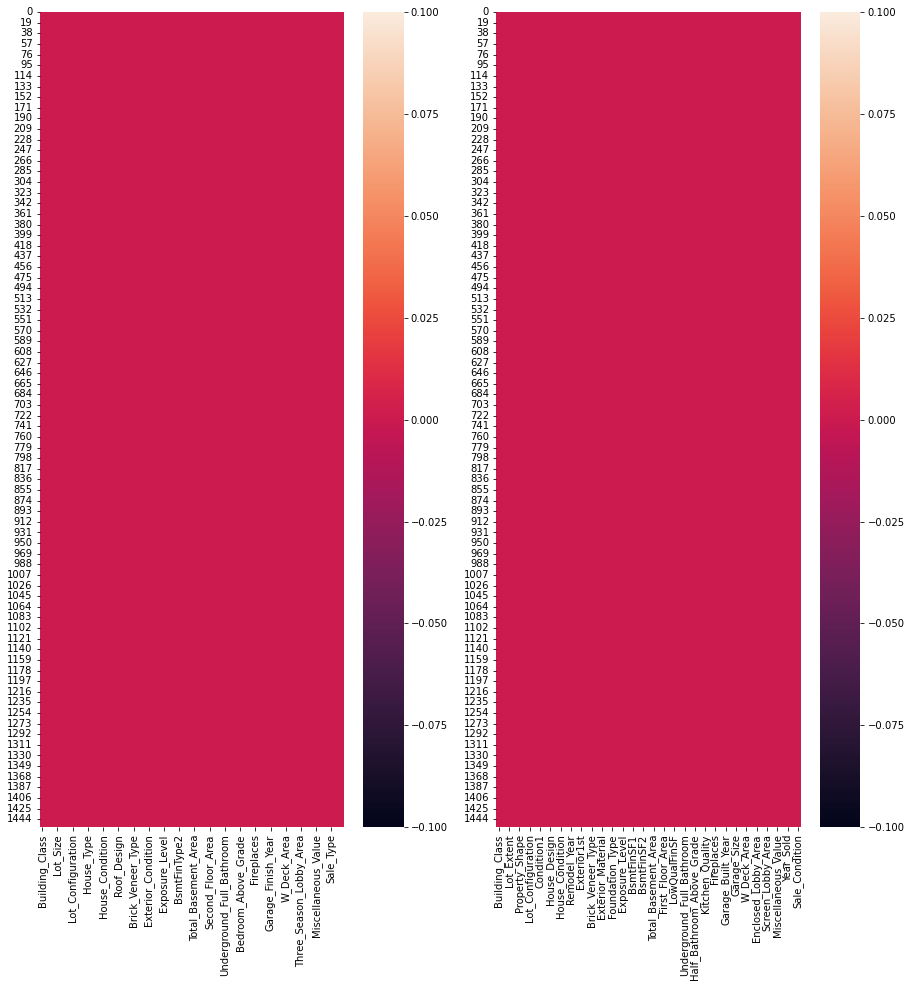

In [37]:
# confirm changes
fig, axes = plt.subplots(1, 2, figsize=(15,15))
sns.heatmap(df_train.isnull(), ax=axes[0])
sns.heatmap(df_test.isnull(), ax=axes[1])

#Outliers treatment.

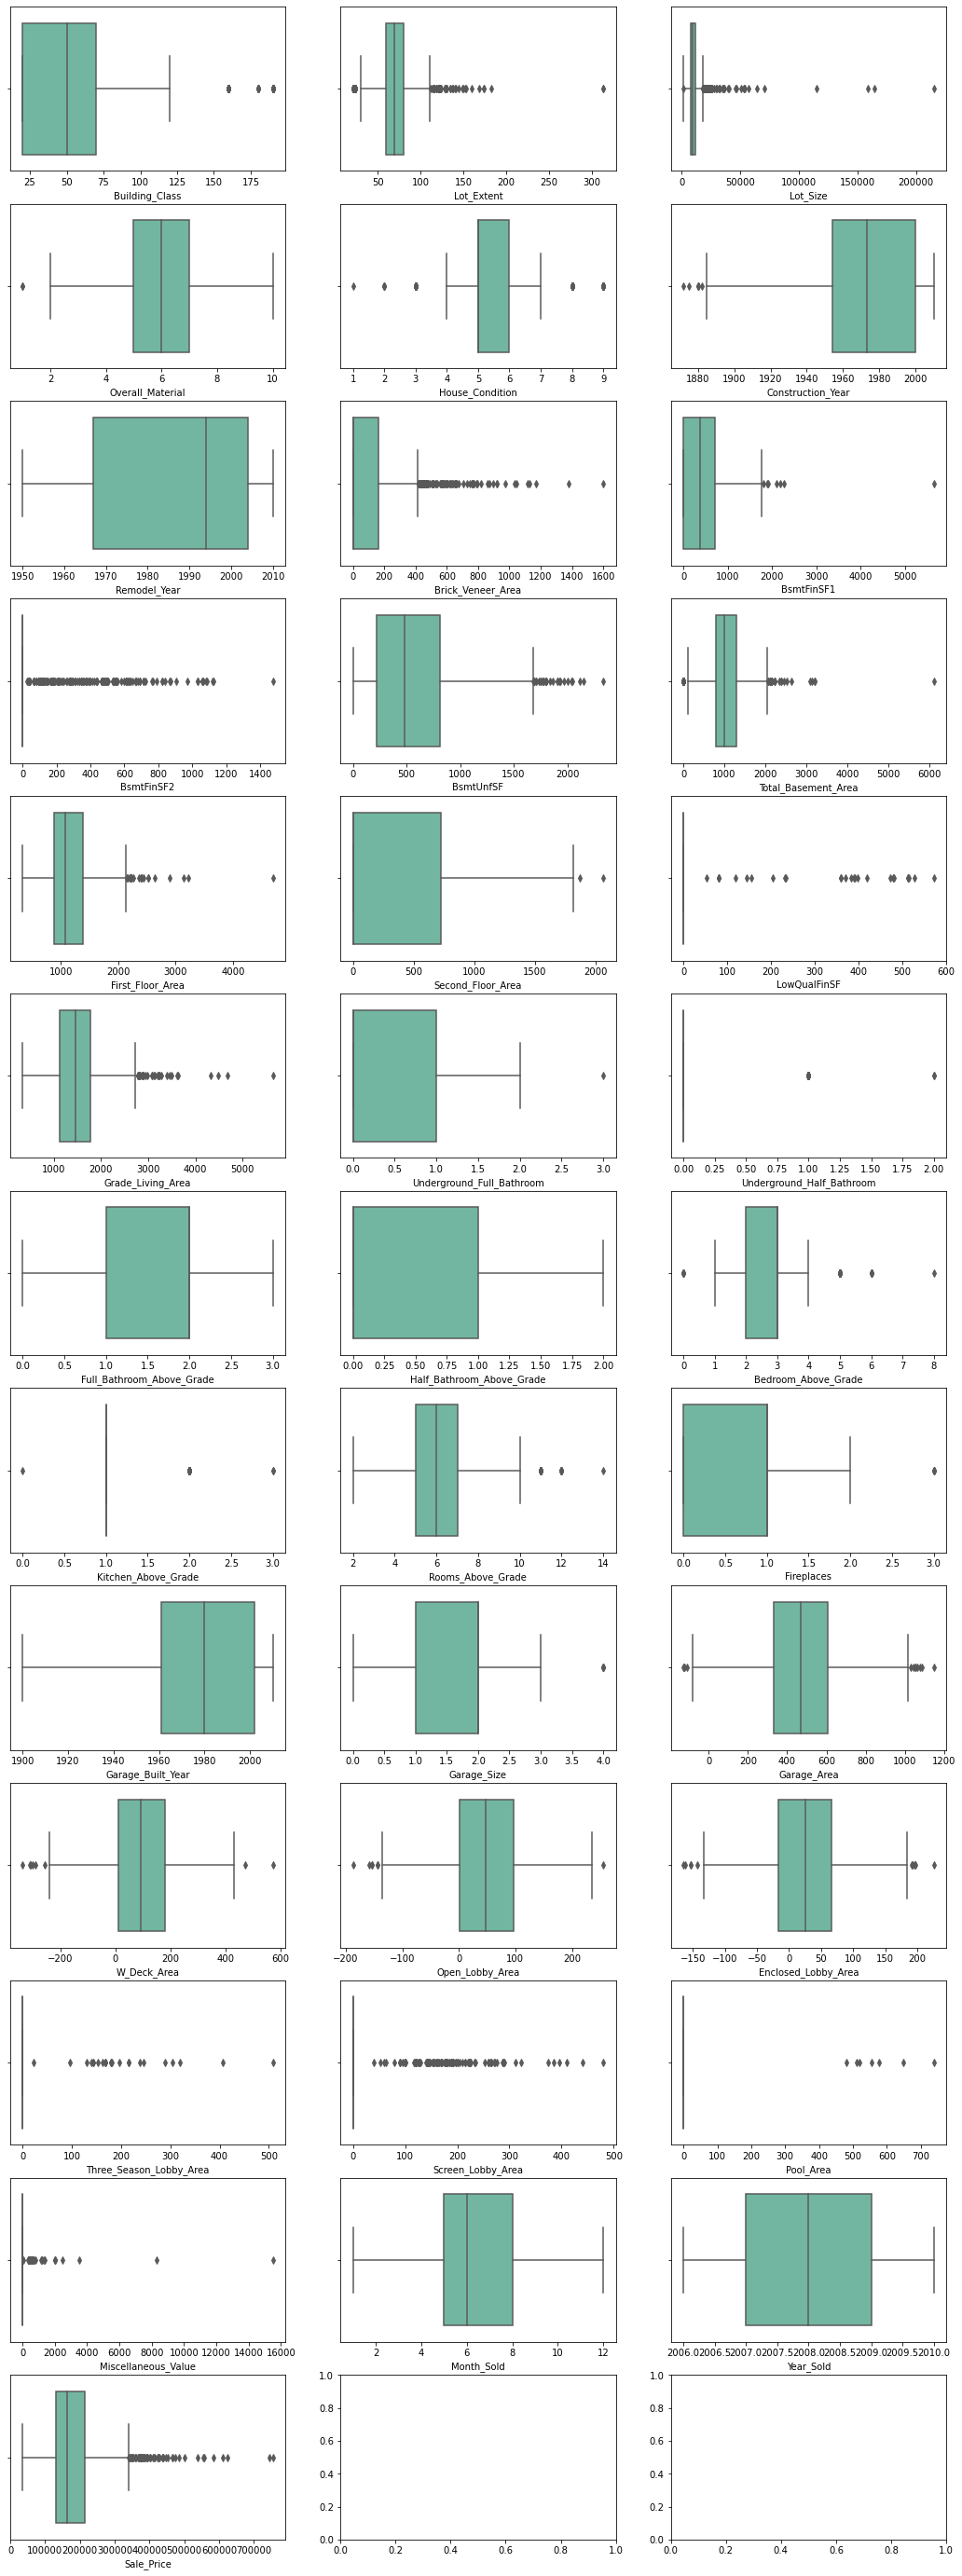

In [38]:
fig, axes = plt.subplots(13, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_numerical_train.columns:
    if j==3:
        i += 1
        j = 0
        sns.boxplot(x=df_numerical_train[col],data=df_numerical_train, palette="Set2", ax=axes[i,j])
    else:
        sns.boxplot(x=df_numerical_train[col],data=df_numerical_train, palette="Set2", ax=axes[i,j])
    j += 1

In [39]:
Q1 = np.percentile(df_train['Sale_Price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_train['Sale_Price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = np.where(df_train['Sale_Price'] >= (Q3+1.5*IQR))
# lower bound
lower = np.where(df_train['Sale_Price'] <= (Q1-1.5*IQR))
# drop outlires
df_train.drop(upper[0], errors='ignore', inplace = True)
df_train.drop(lower[0], errors='ignore', inplace = True)

In [40]:
def remove_outlires(df, columns_list):
    for col in columns_list:
        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        # Upper bound
        upper = np.where(df[col] >= (Q3+1.5*IQR))
        # lower bound
        lower = np.where(df[col] <= (Q1-1.5*IQR))
        # drop outlires
        df.drop(upper[0], errors='ignore', inplace = True)
        df.drop(lower[0], errors='ignore', inplace = True)

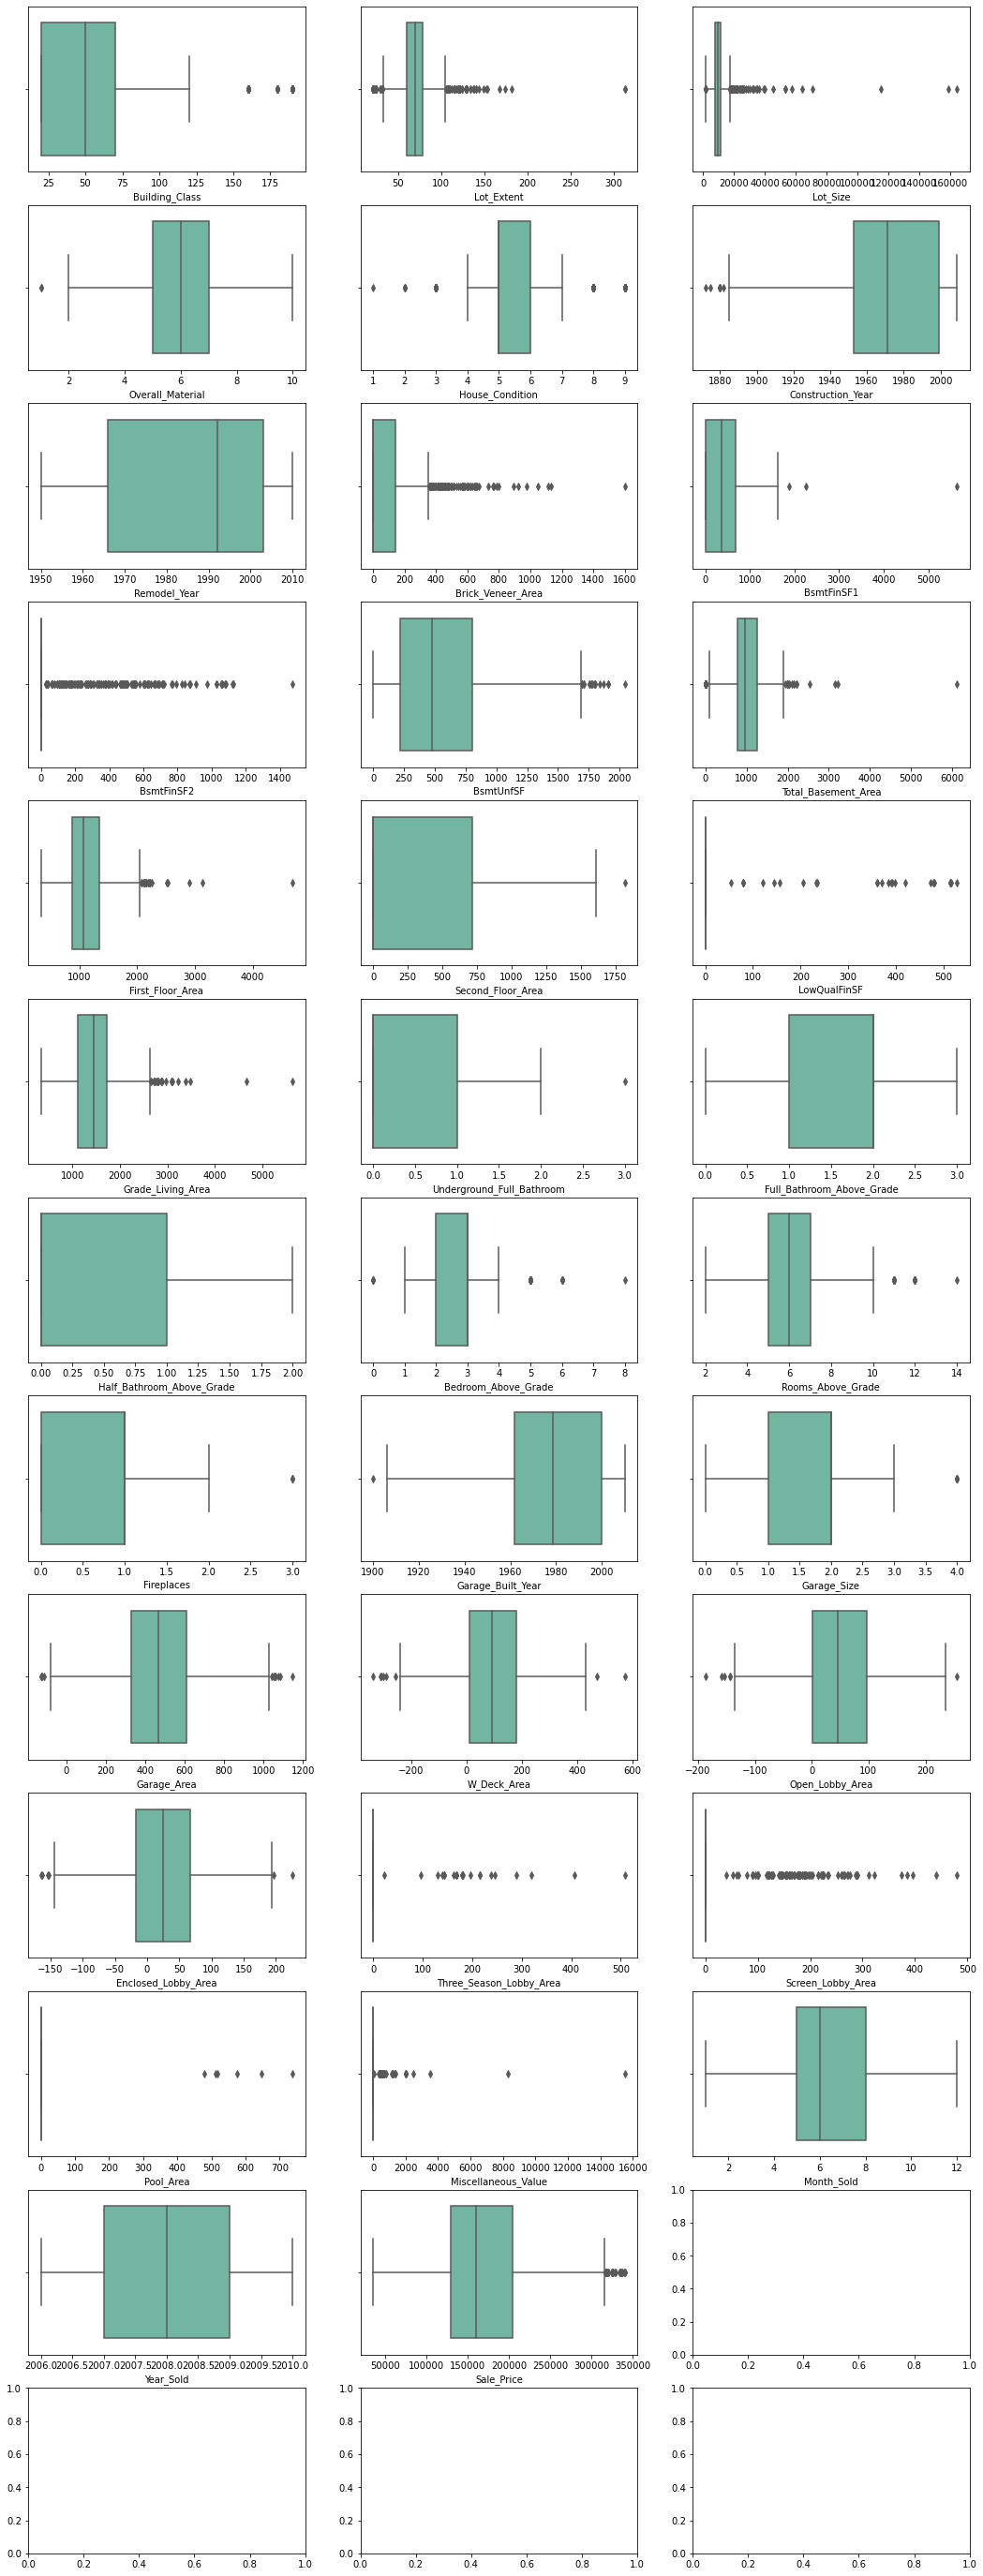

In [41]:
fig, axes = plt.subplots(13, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_train:
    if col in numerical_cols:
        if j==3:
            i += 1
            j = 0
            sns.boxplot(x=df_train[col],data=df_train, palette="Set2", ax=axes[i,j])
        else:
            sns.boxplot(x=df_train[col],data=df_train, palette="Set2", ax=axes[i,j])
        j += 1

In [42]:
numerical_cols_new = []
categorical_cols_new = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        numerical_cols_new.append(df_train[col].name)
    else:
        categorical_cols_new.append(df_train[col].name)

In [43]:
train_dummies = pd.get_dummies(df_train[categorical_cols_new], drop_first=True)
test_dummies = pd.get_dummies(df_test[categorical_cols_new], drop_first=True)

In [44]:
df_train.drop(categorical_cols_new, axis=1, inplace=True)
df_test.drop(categorical_cols_new, axis=1, inplace=True)

In [45]:
df_train = df_train.join(train_dummies)
df_test = df_test.join(test_dummies)

In [46]:
for col in df_train:
    if (col not in df_test.columns) & (col != 'Sale_Price'):
        df_train.drop(col, axis=1, inplace=True)
        
for col in df_test:
    if col not in df_train.columns:
        df_test.drop(col, axis=1, inplace=True)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1458
Columns: 180 entries, Building_Class to Sale_Condition_Partial
dtypes: float64(7), int64(28), uint8(145)
memory usage: 623.4 KB


In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 179 entries, Building_Class to Sale_Condition_Partial
dtypes: float64(11), int64(23), uint8(145)
memory usage: 637.8 KB


#Spliting the data in train and test.

In [49]:
from sklearn.model_selection import train_test_split
y = df_train['Sale_Price']
X = df_train.drop('Sale_Price', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the data to get accurate output.

In [51]:
#Scaling/Normalising the data with the help of StandardScaler.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled = sc.fit_transform(X_train)

In [52]:
x_test_scaled = sc.fit_transform(X_test)

In [53]:
x_train_scaled

array([[-0.8948823 , -0.16096054, -0.32756728, ..., -0.12792043,
         0.45391739, -0.27006788],
       [-0.8948823 ,  0.01925801,  0.13895424, ..., -0.12792043,
         0.45391739, -0.27006788],
       [-0.8948823 , -0.56185867, -0.33654416, ..., -0.12792043,
        -2.20304406, -0.27006788],
       ...,
       [ 0.04464432,  0.0172164 , -0.119718  , ..., -0.12792043,
         0.45391739, -0.27006788],
       [-0.8948823 ,  2.06625126,  0.46778424, ..., -0.12792043,
         0.45391739, -0.27006788],
       [-0.19023733,  0.01925801, -0.85126462, ..., -0.12792043,
         0.45391739, -0.27006788]])

In [54]:
x_test_scaled

array([[ 1.4877474 , -2.06854096, -0.49801378, ..., -0.08481889,
         0.39626354, -0.26211122],
       [-0.8074001 ,  0.13176137, -0.09850506, ..., -0.08481889,
         0.39626354, -0.26211122],
       [-0.11885585,  0.7107883 ,  0.58160081, ..., -0.08481889,
         0.39626354, -0.26211122],
       ...,
       [ 0.5696884 ,  1.92674485, -0.10021601, ..., -0.08481889,
         0.39626354, -0.26211122],
       [-0.57788535, -1.02629249, -0.08396191, ..., -0.08481889,
         0.39626354, -0.26211122],
       [ 0.79920315, -0.73677903,  0.19834619, ..., -0.08481889,
         0.39626354, -0.26211122]])

#Performing model prediction.

In [55]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = lmodel.predict(X_test)
y_pred

array([158701.23406034, 139668.18560835, 141706.63689896, 186464.88202368,
       312345.94704501, 162431.8117198 ,  60232.6063506 , 282190.60522909,
       136909.5848458 , 209886.3963463 ,  75926.77938704, 225414.27203025,
       209683.79348286, 110675.90224994, 144958.66117928, 159979.11186002,
       213622.85311925,  76425.83550243, 134815.64829755, 265773.11529356,
       155666.86420719, 185151.09126233,  53881.89392955, 127597.16625309,
       293283.90139551, 160902.05991389, 133732.74473344, 160147.06144348,
       110857.83902394, 270018.15584574, 286414.42149411, 165332.88854613,
       168863.81114393, 203613.49834389, 117573.40931393, 147598.58760342,
       131687.429174  , 188792.6507408 , 208128.9181129 , 162632.00307773,
       129128.80883001, 113154.18196955, 223479.98585696, 136961.42267493,
       222011.29565556, 106347.62727556, 158124.76434336, 128595.47779466,
       213988.18475887,  95553.67415556, 305104.45474941, 192771.38652436,
       254856.67836093, 1

In [57]:
y_test.values

array([153500, 140000, 134432, 168500, 302000, 173000,  73000, 319000,
       139000, 186700,  40000, 250580, 230500, 118000, 140000, 170000,
       227000,  95000, 129000, 143000, 174000, 177000,  61000, 143900,
       290000, 172500, 144000, 144000, 110500, 301500, 333168, 129500,
       170000, 207500, 110000, 145000, 131500, 186500, 197000, 152000,
       124500, 144000, 244000, 127000, 245350, 110000, 169000, 133000,
       189000, 100000, 310000, 182900, 287090, 105500,  90000,  87000,
       210000, 287000, 140000, 250000, 265900, 169500, 179000,  91300,
       151000, 183000, 135000,  84000, 233170, 214900, 229456, 228000,
       141000, 151000, 116000, 226700, 100000, 215000, 110000,  84500,
       171000, 148000, 163990, 144000, 197000,  80000, 149900, 152000,
       215000, 184000, 236500, 157000, 175000, 165500, 112000, 132000,
       287000, 100000, 167900,  58500, 121600, 110000, 110000, 167500,
       108000, 140000, 160000, 127000, 207000, 180000, 277000, 130000,
      

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
mean_absolute_error(y_test,y_pred)

15792.594801641788

In [60]:
np.sqrt(mean_squared_error(y_test,y_pred))

21438.1860792718

In [61]:
r2_score(y_test,y_pred)

0.8699773132289386

In [62]:
subm_preds = lmodel.predict(df_test)
subm_preds

array([110832.06796473, 147488.8206069 , 171034.69114633, ...,
       145347.25459007, 100168.2912106 , 196526.96243974])

In [63]:
submission = pd.DataFrame({
        "Id": id_test_list,
        "Sale_Price": subm_preds})

In [64]:
submission.to_csv('Result.csv', index=False)